In [1]:
%pip install phiflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
from phi.flow import *

In [3]:
v = StaggeredGrid(
    values = lambda pos: vec(
        x=math.cos(pos).vector["x"] * math.sin(pos).vector["y"],
        y=-math.sin(pos).vector["x"] * math.cos(pos).vector["y"],
    ),
    extrapolation=extrapolation.PERIODIC,
    x=25,
    y=25,
    bounds=Box(x=2*PI, y=2*PI)
)

In [5]:
import matplotlib as plt
import matplotlib.animation as animation
plt.style.use("dark_background")

/Users/noahday/opt/anaconda3/envs/notebook/lib/python3.10/site-packages/phi/field/_field.py:142: FutureWarning: Instance checks on Grid are deprecated and will be removed in version 3.0. Use the methods instance.is_grid, instance.is_point_cloud, instance.is_centered and instance.is_staggered instead.
  return isinstance(self, Grid)
/Users/noahday/opt/anaconda3/envs/notebook/lib/python3.10/site-packages/phi/field/_field.py:148: FutureWarning: Instance checks on PointCloud are deprecated and will be removed in version 3.0. Use the methods instance.is_grid, instance.is_point_cloud, instance.is_centered and instance.is_staggered instead.
  return isinstance(self, PointCloud)


<Figure size 1200x500 with 1 Axes>

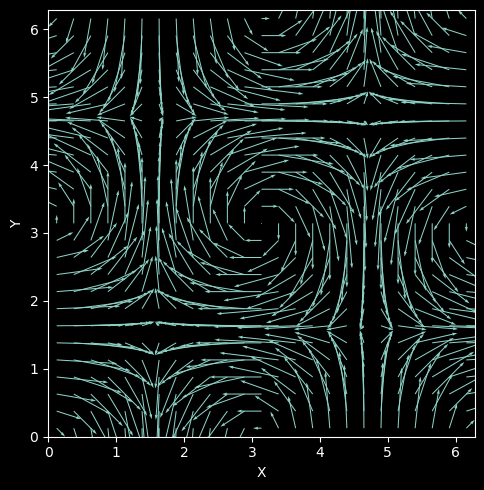

In [6]:
plot(v)

In [16]:
def make_step(v, dt=0.5):
    v = advect.semi_lagrangian(v, v, dt=dt)
    v = diffuse.implicit(v, 0.1, dt)
    v, _ = fluid.make_incompressible(v)
    return v

In [17]:
trj = iterate(make_step, batch(time=20), v)

In [18]:
plot(trj, animate="time", size=(5,5))

/Users/noahday/opt/anaconda3/envs/notebook/lib/python3.10/site-packages/phi/field/_field.py:142: FutureWarning: Instance checks on Grid are deprecated and will be removed in version 3.0. Use the methods instance.is_grid, instance.is_point_cloud, instance.is_centered and instance.is_staggered instead.
  return isinstance(self, Grid)
/Users/noahday/opt/anaconda3/envs/notebook/lib/python3.10/site-packages/phi/field/_field.py:148: FutureWarning: Instance checks on PointCloud are deprecated and will be removed in version 3.0. Use the methods instance.is_grid, instance.is_point_cloud, instance.is_centered and instance.is_staggered instead.
  return isinstance(self, PointCloud)


In [11]:
trj

StaggeredGrid[(timeᵇ=21, xˢ=25, yˢ=25, vectorᶜ=x,y), size=(x=6.283, y=6.283), extrapolation=periodic]